In [1]:
import umap
import pandas as pd
import numpy as np
import igraph as ig
from IPython.core.display import display, SVG
import matplotlib.pyplot as plt

In [2]:
def readGraph(fn, directed=False):
    g = ig.Graph.Read_Ncol(fn+'.edgelist',directed=directed)
    c = np.loadtxt(fn+'.community',dtype='uint8')
    node_base = min([int(x['name']) for x in g.vs]) ## graphs have 1-based or 0-based nodes 
    comm_base = min(c) ## same for communities
    comm = [c[int(x['name'])-node_base]-comm_base for x in g.vs]
    g.vs['community'] = comm
    g.vs['shape'] = 'circle'
    pal = ig.RainbowPalette(n=max(comm)+1)
    g.vs['color'] = [pal.get(int(i)) for i in comm]
    g.vs['size'] = 10
    g.es['width'] = 1
    return g

In [3]:
## Read embedding from file in node2vec format
## For visualization: use UMAP if dim > 2
def embed2layout(fn):
    D = pd.read_csv(fn, sep=' ', skiprows=1, header=None)
    D = D.dropna(axis=1)
    D = D.sort_values(by=0)
    Y = np.array(D.iloc[:,1:])
    if Y.shape[1]>=2:
        Y = umap.UMAP().fit_transform(Y)
    ly = []
    for v in range(Y.shape[0]):
        ly.append((Y[v][0],Y[v][1]))
    return ly


In [4]:
## read LFR 15 graph
g = readGraph('Data/LFR15/lfr15')
g.vs['size'] = 8

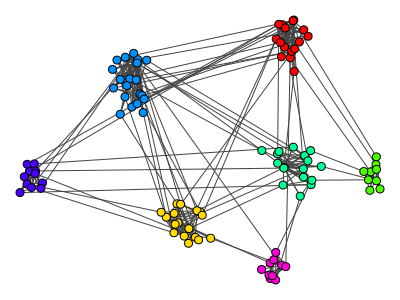

In [5]:
## Load embedding

#l = embed2layout('Data/LFR15/lfr15-embedding--verse-64-0')
#l = embed2layout('Data/LFR15/lfr15-embedding--verse-2-0')
#l = embed2layout('Data/LFR15/lfr15-embedding--n2v-64-1.0-0')
#l = embed2layout('Data/LFR15/lfr15-embedding--n2v-2-1.0-0')
l = embed2layout('Data/LFR15/lfr15-embedding--line-64-5-0')
#l = embed2layout('Data/LFR15/lfr15-embedding--line-2-5-0')

## re-order w.r.t. vertex names and plot
ly = []
for v in g.vs:
    ly.append(l[int(v['name'])-1])
ig.plot(g, layout=ly, bbox=(0,0,400,300))